# **Project Objective**

**The primary goal of this project is to develop a predictive model to estimate **muscle mass gained** by individuals over a training period.**

### Modeling Goals

- **Predictive Accuracy**: Build a robust model that accurately predicts muscle mass gained on unseen data.
- **Feature Insights**: Identify and understand the key factors (e.g., training frequency, workout intensity, diet, sleep, etc.) that influence muscle mass gain.
- **Data Preprocessing**: Experiment with techniques for imputing missing values and handling outliers to enhance model performance.

This dataset offers a comprehensive platform for applying machine learning techniques in the health and fitness domain, aiming to provide actionable insights and improve training strategies.

# **import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **load the dataset**

In [2]:
df = pd.read_csv("muscle_growth.csv")

In [3]:
df.head()

,id,age,gender,height,weight,gym_frequency,workout_intensity,protein_intake,sleep_hours,training_experience,initial_muscle_mass,final_muscle_mass,body_fat_percentage,supplement_use,workout_type,diet_type,hydration_level,stress_level,session_duration,recovery_rate
0,1,56.0,M,181.2,96.0,2.0,6.0,201.0,9.0,Intermediate,45.2,47.4,22.2,Protein,Cardio,Omnivore,2.9,2.0,86.0,slow
1,2,46.0,F,179.0,79.6,7.0,5.0,155.0,8.0,Experienced,25.2,26.4,18.4,Protein,Mixed,Omnivore,4.0,5.0,43.0,fast
2,3,32.0,F,177.1,67.4,2.0,1.0,148.0,8.0,Intermediate,27.8,29.7,17.3,Pre-workout,Mixed,Omnivore,2.8,5.0,78.0,medium
3,4,60.0,M,184.4,91.8,2.0,6.0,195.0,7.0,Experienced,37.4,38.3,21.6,NoUse,Cardio,Omnivore,2.0,3.0,59.0,medium
4,5,25.0,F,151.2,50.3,5.0,2.0,107.0,7.0,Beginner,19.2,23.1,22.6,NoUse,Mixed,Vegetarian,3.2,9.0,73.0,fast


# **EDA**

In [4]:
df.shape

(30000, 20)

In [5]:
df.dtypes

id                       int64
age                    float64
gender                  object
height                 float64
weight                 float64
gym_frequency          float64
workout_intensity      float64
protein_intake         float64
sleep_hours            float64
training_experience     object
initial_muscle_mass    float64
final_muscle_mass      float64
body_fat_percentage    float64
supplement_use          object
workout_type            object
diet_type               object
hydration_level        float64
stress_level           float64
session_duration       float64
recovery_rate           object
dtype: object

In [6]:
df.describe()

,id,age,height,weight,gym_frequency,workout_intensity,protein_intake,sleep_hours,initial_muscle_mass,final_muscle_mass,body_fat_percentage,hydration_level,stress_level,session_duration
count,30000.000000,26853.000000,26739.000000,27265.000000,26492.000000,25810.000000,28118.000000,25851.000000,25727.000000,26122.000000,26608.000000,26366.000000,25739.000000,26931.000000
mean,15000.500000,41.507169,172.455959,78.056739,3.995923,5.483417,155.026140,7.501257,30.196494,32.811469,20.015958,2.753478,5.512180,61.958784
std,8660.398374,13.858857,12.652185,20.473267,2.004313,2.875161,39.966278,1.115335,9.273932,9.350308,4.998137,0.724106,2.881913,26.046805
min,1.000000,18.000000,150.000000,40.600000,1.000000,1.000000,73.000000,6.000000,12.700000,13.800000,10.000000,1.500000,1.000000,30.000000
25%,7500.750000,30.000000,162.800000,62.900000,2.000000,3.000000,125.000000,7.000000,23.300000,25.800000,16.300000,2.100000,3.000000,45.000000
50%,15000.500000,41.000000,171.500000,74.900000,4.000000,5.000000,149.000000,8.000000,28.500000,31.100000,20.000000,2.800000,5.000000,60.000000
75%,22500.250000,54.000000,180.000000,89.700000,6.000000,8.000000,179.000000,8.000000,35.600000,38.300000,23.800000,3.400000,8.000000,76.000000
max,30000.000000,65.000000,200.000000,230.200000,7.000000,10.000000,305.000000,9.000000,67.700000,71.400000,30.000000,4.000000,10.000000,300.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   30000 non-null  int64  
 1   age                  26853 non-null  float64
 2   gender               27568 non-null  object 
 3   height               26739 non-null  float64
 4   weight               27265 non-null  float64
 5   gym_frequency        26492 non-null  float64
 6   workout_intensity    25810 non-null  float64
 7   protein_intake       28118 non-null  float64
 8   sleep_hours          25851 non-null  float64
 9   training_experience  27654 non-null  object 
 10  initial_muscle_mass  25727 non-null  float64
 11  final_muscle_mass    26122 non-null  float64
 12  body_fat_percentage  26608 non-null  float64
 13  supplement_use       30000 non-null  object 
 14  workout_type         26578 non-null  object 
 15  diet_type            27534 non-null 

In [8]:
df.nunique()

id                     30000
age                       48
gender                     2
height                   501
weight                  1077
gym_frequency              7
workout_intensity         10
protein_intake           226
sleep_hours                4
training_experience        3
initial_muscle_mass      527
final_muscle_mass        540
body_fat_percentage      201
supplement_use             4
workout_type               3
diet_type                  4
hydration_level           26
stress_level              10
session_duration         154
recovery_rate              3
dtype: int64

In [9]:
df["gender"].value_counts()

gender
F    13816
M    13752
Name: count, dtype: int64

### **EDA with Visualizations**

In [11]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'gym_frequency',
       'workout_intensity', 'protein_intake', 'sleep_hours',
       'training_experience', 'initial_muscle_mass', 'final_muscle_mass',
       'body_fat_percentage', 'supplement_use', 'workout_type', 'diet_type',
       'hydration_level', 'stress_level', 'session_duration', 'recovery_rate'],
      dtype='object')

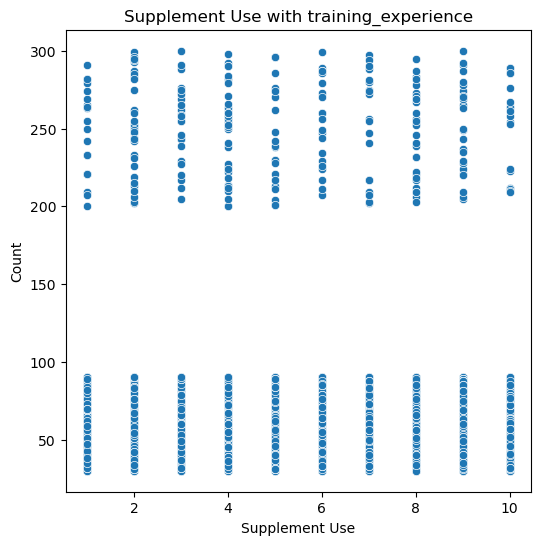

In [28]:
plt.figure(figsize=(6, 6))
sns.scatterplot(df, x="workout_intensity", y="session_duration")
plt.xlabel("Supplement Use")
plt.ylabel("Count")
plt.title("Supplement Use with training_experience")
plt.show()

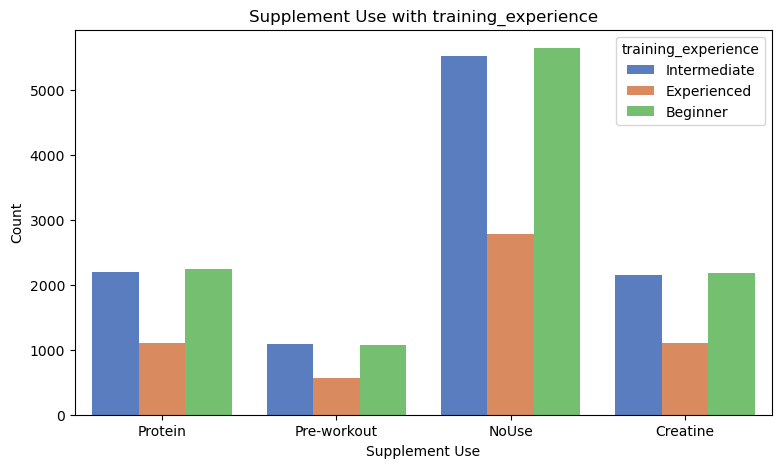

In [26]:
plt.figure(figsize=(9, 5))
sns.countplot(df, x="supplement_use", hue="training_experience", palette="muted")
plt.xlabel("Supplement Use")
plt.ylabel("Count")
plt.title("Supplement Use with training_experience")
plt.show()